In [1]:
import os
os.environ["R_HOME"] = "/home/huangzhuoli/mambaforge/envs/tensorqtl/lib/R"
os.environ["R_LIBS_USER"] = "/home/huangzhuoli/mambaforge/envs/tensorqtl/lib/R/library"
import pandas as pd
import tensorqtl

In [ ]:
eqtl_celltype = pd.read_csv('/CIMA/Data/20241230_xQTL_cell_sample_number/20241230_celltype_70_scRNA.csv')
eqtl_celltype = eqtl_celltype ['final_annotation']

caqtl_celltype = pd.read_csv('/CIMA/Data/20241230_xQTL_cell_sample_number/20241230_celltype_70_scATAC.csv')
caqtl_celltype = caqtl_celltype ['final_annotation']

In [ ]:
cis_df_all = pd.DataFrame()
for celltype in eqtl_celltype:
    print(f'reading_{celltype}')
    cis_df = pd.read_csv(f'/CIMA/Result/eQTL_tensorqtl/{celltype}/all_lead_perm.csv')
    tensorqtl.calculate_qvalues(cis_df)
    cis_df_all = pd.concat([cis_df_all, cis_df], axis=0, ignore_index=True)  # 按行合并
cis_df_all = cis_df_all.rename(columns={
    "qval": "celltype_level_qval",
    "pval_nominal_threshold": "celltype_level_pval_nominal_threshold"
})
tensorqtl.calculate_qvalues(cis_df_all)
cis_df_all = cis_df_all.rename(columns={
    "qval": "study_wise_qval",
    "pval_nominal_threshold": "study_wise_nominal_threshold"
})

reading_Atypical_Bm_ITGAX
Computing q-values
  * Number of phenotypes tested: 6621
  * Correlation between Beta-approximated and empirical p-values: 0.9999
  * Proportion of significant phenotypes (1-pi0): 0.27
  * QTL phenotypes @ FDR 0.05: 520
  * min p-value threshold @ FDR 0.05: 0.00536929
reading_Bn_IFIT3
Computing q-values
  * Number of phenotypes tested: 2666
  * Correlation between Beta-approximated and empirical p-values: 0.9999
  * Proportion of significant phenotypes (1-pi0): 0.23
  * QTL phenotypes @ FDR 0.05: 100
  * min p-value threshold @ FDR 0.05: 0.00245762
reading_Bn_TCL1A
Computing q-values
  * Number of phenotypes tested: 10613
  * Correlation between Beta-approximated and empirical p-values: 0.9999
  * Proportion of significant phenotypes (1-pi0): 0.48
  * QTL phenotypes @ FDR 0.05: 2592
  * min p-value threshold @ FDR 0.05: 0.0234177
reading_Bn_IL6
Computing q-values
  * Number of phenotypes tested: 4499
  * Correlation between Beta-approximated and empirical p-va

In [4]:
print(len(cis_df_all[cis_df_all['study_wise_qval'] < 0.05]['phenotype_id'].unique()))
print(len(cis_df_all[cis_df_all['celltype_level_qval'] < 0.05]['phenotype_id'].unique()))

9600
10619


In [5]:
cis_df_all_eQTL = cis_df_all.copy()

In [6]:
cis_df_all_eQTL

,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,start_distance,end_distance,ma_samples,...,pval_nominal,slope,slope_se,pval_perm,pval_beta,celltype,celltype_level_qval,celltype_level_pval_nominal_threshold,study_wise_qval,study_wise_nominal_threshold
0,LINC01128,2344,1.029518,146.58803,297.09668,6.708564e-08,chr1_814733,-10405,-10405,80,...,3.584424e-09,0.624462,0.103139,0.000100,6.909136e-06,Atypical_Bm_ITGAX,1.434822e-04,0.000043,6.252067e-05,0.000091
1,NOC2L,2661,1.036435,149.99258,292.07280,1.567649e-04,chr1_1000453,41144,41144,89,...,3.071558e-05,-0.424332,0.100490,0.019398,1.995286e-02,Atypical_Bm_ITGAX,1.378258e-01,0.000044,7.760215e-02,0.000092
2,ISG15,2844,1.050670,171.72702,294.35812,1.272715e-02,chr1_1991213,990075,990075,231,...,6.212973e-03,0.169131,0.061440,0.877612,8.794524e-01,Atypical_Bm_ITGAX,7.101262e-01,0.000041,6.273646e-01,0.000085
3,SDF4,3331,1.033592,213.36246,296.95544,3.195724e-04,chr1_932733,-299334,-299334,222,...,8.303203e-05,-0.267882,0.067279,0.055694,5.933612e-02,Atypical_Bm_ITGAX,2.715093e-01,0.000030,1.713186e-01,0.000064
4,B3GALT6,3332,1.022795,212.23169,298.10095,1.475744e-03,chr1_1129916,-102321,-102321,256,...,5.203349e-04,-0.249661,0.071287,0.264874,2.590330e-01,Atypical_Bm_ITGAX,5.092529e-01,0.000029,3.898847e-01,0.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473965,SCO2,2849,1.060767,184.78722,294.42856,1.638232e-03,chr22_50503556,-22905,-22905,166,...,4.876821e-04,0.196858,0.055934,0.234077,2.356054e-01,Transitional_NK_GZMK,3.926900e-01,0.000061,3.733127e-01,0.000083
473966,TYMP,2839,1.026475,201.65668,303.79086,3.764249e-05,chr22_50524928,-5104,-5104,215,...,7.008779e-06,0.219618,0.048159,0.006499,6.570238e-03,Transitional_NK_GZMK,4.122563e-02,0.000048,3.144437e-02,0.000065
473967,CHKB,2635,1.028314,181.64566,301.37247,1.131288e-28,chr22_50584092,-17363,-17363,112,...,5.058967e-34,0.900175,0.066533,0.000100,3.803812e-27,Transitional_NK_GZMK,4.020332e-25,0.000053,2.126050e-25,0.000073
473968,ARSA,2588,1.017033,179.06967,302.07037,2.222913e-06,chr22_50632944,4771,4771,260,...,2.294504e-07,0.335263,0.063558,0.000100,3.457787e-04,Transitional_NK_GZMK,3.126568e-03,0.000051,2.313273e-03,0.000070


In [ ]:
cis_df_all = pd.DataFrame()
for celltype in caqtl_celltype:
    print(f'reading_{celltype}')
    cis_df = pd.read_csv(f'/CIMA/Result/caQTL_tensorqtl/{celltype}/all_lead_perm.csv')
    tensorqtl.calculate_qvalues(cis_df)
    cis_df_all = pd.concat([cis_df_all, cis_df], axis=0, ignore_index=True)  # 按行合并
cis_df_all = cis_df_all.rename(columns={
    "qval": "celltype_level_qval",
    "pval_nominal_threshold": "celltype_level_pval_nominal_threshold"
})
tensorqtl.calculate_qvalues(cis_df_all)
cis_df_all = cis_df_all.rename(columns={
    "qval": "study_wise_qval",
    "pval_nominal_threshold": "study_wise_nominal_threshold"
})

reading_Atypical_Bm_ITGAX
Computing q-values
  * Number of phenotypes tested: 10609
  * Correlation between Beta-approximated and empirical p-values: 0.9999
  * Proportion of significant phenotypes (1-pi0): 0.14
  * QTL phenotypes @ FDR 0.05: 398
  * min p-value threshold @ FDR 0.05: 0.00218406
reading_Bn_TCL1A
Computing q-values
  * Number of phenotypes tested: 32783
  * Correlation between Beta-approximated and empirical p-values: 0.9999
  * Proportion of significant phenotypes (1-pi0): 0.37
  * QTL phenotypes @ FDR 0.05: 6194
  * min p-value threshold @ FDR 0.05: 0.0149682
reading_CD4_CTL_GZMH
Computing q-values
  * Number of phenotypes tested: 15356
  * Correlation between Beta-approximated and empirical p-values: 0.9999
  * Proportion of significant phenotypes (1-pi0): 0.20
  * QTL phenotypes @ FDR 0.05: 1169
  * min p-value threshold @ FDR 0.05: 0.00476197
reading_CD4_Tcm_CXCR5
Computing q-values
  * Number of phenotypes tested: 5863
  * Correlation between Beta-approximated and 

In [8]:
print(len(cis_df_all[cis_df_all['study_wise_qval'] < 0.05]['phenotype_id'].unique()))
print(len(cis_df_all[cis_df_all['celltype_level_qval'] < 0.05]['phenotype_id'].unique()))

52361
56226


In [9]:
cis_df_all_caQTL = cis_df_all.copy()

In [10]:
#MHC region
# 生成从 chr6_28510120 到 chr6_33480577 的每个碱基
chromosome = 6
start_pos = 28510120
end_pos = 33480577

# 使用列表推导式生成列表
positions = [f"chr{chromosome}_{i}" for i in range(start_pos, end_pos + 1)]

# 打印列表的前几个元素（为了方便查看）
print(positions[:10])  # 打印前 10 个元素


['chr6_28510120', 'chr6_28510121', 'chr6_28510122', 'chr6_28510123', 'chr6_28510124', 'chr6_28510125', 'chr6_28510126', 'chr6_28510127', 'chr6_28510128', 'chr6_28510129']


In [ ]:
cis_df_all_eQTL.to_csv('/CIMA/Result/20250108_cis_eQTL_all.csv')

In [ ]:
cis_df_all_caQTL.to_csv('/CIMA/Result/20250108_cis_caQTL_all.csv')

In [13]:
cis_df_all_eQTL_sig = cis_df_all_eQTL[cis_df_all_eQTL['study_wise_qval'] < 0.05]

In [14]:
cis_df_all_caQTL_sig = cis_df_all_caQTL[cis_df_all_caQTL['study_wise_qval'] < 0.05]

In [15]:
#eQTL的sig里面有420个MHC区域的位点
sum(cis_df_all_eQTL_sig['variant_id'].isin(positions))

420

In [16]:
#caQTL的sig里面有420个MHC区域的位点
sum(cis_df_all_caQTL_sig['variant_id'].isin(positions))

768

In [17]:
len(cis_df_all_eQTL_sig['variant_id'].unique())

42354

In [18]:
len(cis_df_all_caQTL_sig['variant_id'].unique())

93555

In [19]:
len(cis_df_all_eQTL_sig['celltype'].unique())

69

In [20]:
len(cis_df_all_caQTL_sig['celltype'].unique())

42

In [21]:
cis_df_all_eQTL_sig.loc[:,'MHC_region'] = cis_df_all_eQTL_sig['variant_id'].isin(positions).values
cis_df_all_caQTL_sig.loc[:,'MHC_region'] = cis_df_all_caQTL_sig['variant_id'].isin(positions).values

/tmp/ipykernel_3370036/623507437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cis_df_all_eQTL_sig.loc[:,'MHC_region'] = cis_df_all_eQTL_sig['variant_id'].isin(positions).values
/tmp/ipykernel_3370036/623507437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cis_df_all_caQTL_sig.loc[:,'MHC_region'] = cis_df_all_caQTL_sig['variant_id'].isin(positions).values


In [ ]:
cis_df_all_eQTL_sig.to_csv('/CIMA/Result/20250108_cis_eQTL_studywise_sig.csv')
cis_df_all_caQTL_sig.to_csv('/CIMA/Result/20250108_cis_caQTL_studywise_sig.csv')

In [23]:
max(cis_df_all_eQTL_sig.groupby('celltype')['variant_id'].unique().apply(len))

5148

In [24]:
max(cis_df_all_caQTL_sig.groupby('celltype')['variant_id'].unique().apply(len))

27391

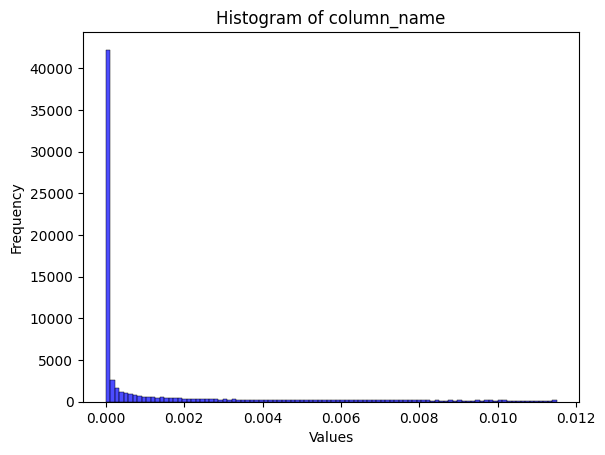

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 seaborn 绘制直方图
sns.histplot(cis_df_all_eQTL_sig['pval_beta'], bins=100, kde=False, color='blue', alpha=0.7)

# 设置标题和标签
plt.title('Histogram of column_name')
plt.xlabel('Values')
plt.ylabel('Frequency')

# 显示图形
plt.show()